# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [1]:
# Load pickled data
import pickle
import numpy as np

data_dir = "data/"
training_file = data_dir + 'train.p'
testing_file = data_dir + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.
n_train = y_train.shape[0]
n_test = y_test.shape[0]
image_shape = X_train[0].shape
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


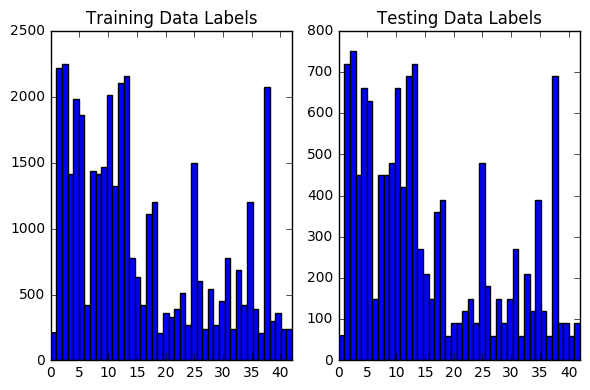

In [3]:
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

#visualize label distribution
plt.subplot(1,2,1).hist(y_train,43);
plt.xlim(0,42)
plt.title('Training Data Labels');
plt.subplot(1,2,2).hist(y_test,43);
plt.title('Testing Data Labels');
plt.xlim(0,42)
plt.tight_layout();

### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

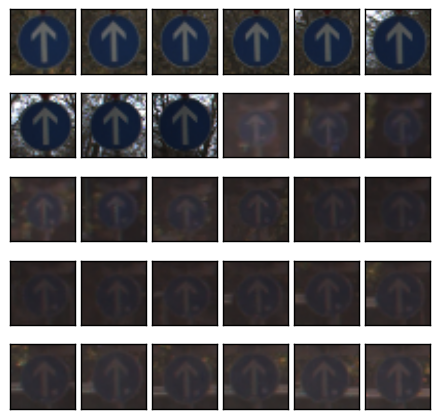

In [6]:
plt.subplots_adjust(hspace=0.1, wspace=0.1, bottom=0.1)

def sample_images(images, labels, rows, cols):
    """Samples images"""
    rnd = random.sample(range(len(X_train)), rows*cols)
    gs = gridspec.GridSpec(rows, cols, top=1.0, bottom=.0, right=.7, left=0., hspace=0.3,
                           wspace=0.1)

    for index, g in enumerate(gs):
        ax = plt.subplot(g)
        img = images[index + 35000]
        ax.imshow(img)
#         plt.title(labels[index])
        plt.imshow(img, cmap=plt.get_cmap('gray'))
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

sample_images(X_train,y_train, 5, 6)    


In [6]:
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

import pickle
import numpy as np

# data_dir = "data/"
# training_file = data_dir + 'train.p'
# testing_file = data_dir + 'test.p'

# with open(training_file, mode='rb') as f:
#     train = pickle.load(f)
# with open(testing_file, mode='rb') as f:
#     test = pickle.load(f)

# X_train, y_train = train['features'], train['labels']
# X_test, y_test = test['features'], test['labels']

batch_size = 32
nb_classes = 43
nb_epoch = 15
data_augmentation = False

# input image dimensions
img_rows, img_cols = 32, 32
# images are RGB
img_channels = 3

# the data, shuffled and split between train and test sets
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.summary()


X_train shape: (39209, 32, 32, 3)
39209 train samples
12630 test samples
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_5 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 32, 32, 32)    0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 30, 30, 32)    9248        activation_7[0][0]               
____________________________________________________________________________________________________
activation_8 (Activation)        (None, 30, 30, 32)    0           convolution2d_6[0][0]            
__________________

In [7]:
from keras.optimizers import Adadelta

# let's train the model using SGD + momentum (how original).
# optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# optimizer = Adam()
optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # this will do preprocessing and realtime data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,
        shear_range=0.1,
        zoom_range=0.1)  # randomly flip images

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(X_train)

    # fit the model on the batches generated by datagen.flow()
    model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, Y_test))

Not using data augmentation.
Train on 39209 samples, validate on 12630 samples
Epoch 1/15
39209/39209 [==============================] - 95s - loss: 1.9876 - acc: 0.4354 - val_loss: 0.6031 - val_acc: 0.8325
Epoch 2/15
39209/39209 [==============================] - 90s - loss: 0.4081 - acc: 0.8723 - val_loss: 0.3157 - val_acc: 0.9207
Epoch 3/15
39209/39209 [==============================] - 90s - loss: 0.2086 - acc: 0.9366 - val_loss: 0.2459 - val_acc: 0.9394
Epoch 4/15
19360/39209 [=============>................] - ETA: 41s - loss: 0.1406 - acc: 0.9551

KeyboardInterrupt: 

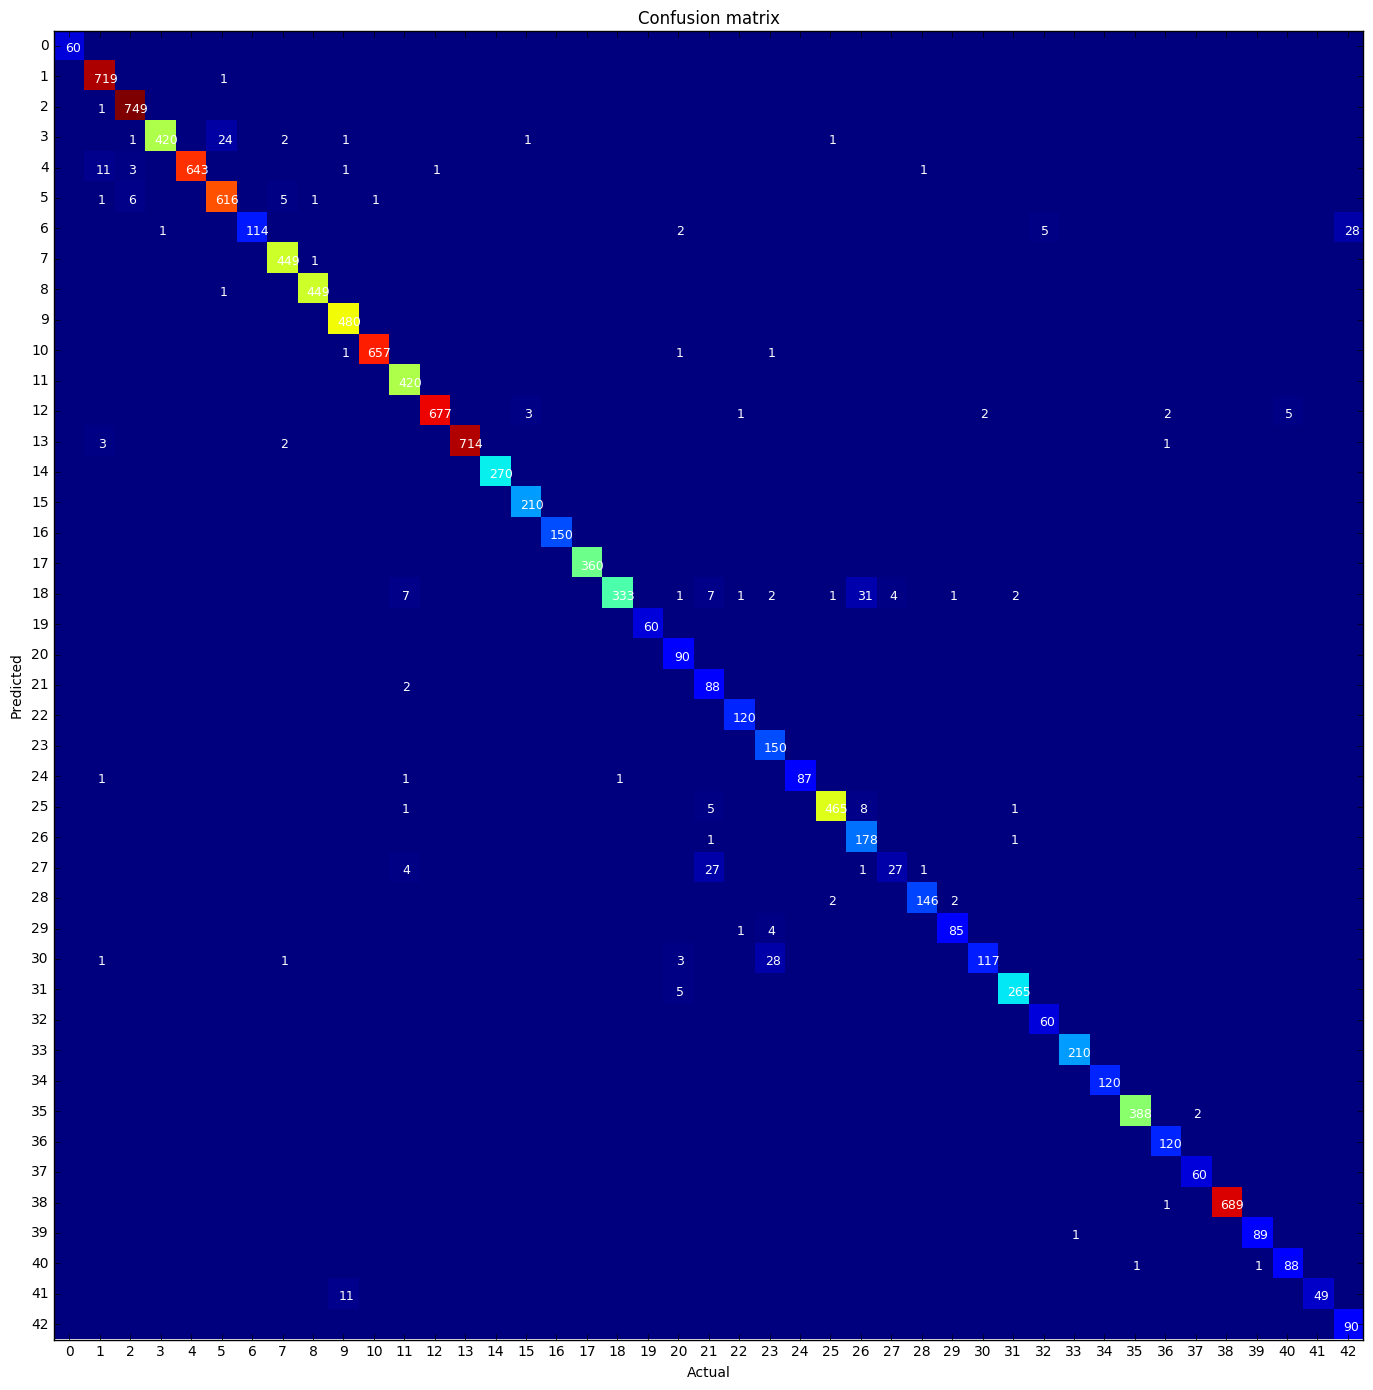

In [7]:
import sklearn.metrics as metrics

predicted_vectors = model.predict(X_test)
predicted_labels = np.argmax(predicted_vectors,axis=1)

cm = metrics.confusion_matrix(y_test, predicted_labels)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(False)
    classes = cm.shape[0]
    plt.xticks(np.arange(classes))
    plt.yticks(np.arange(classes))
    plt.imshow(cm, cmap=plt.cm.jet, interpolation='nearest');

    for i, cas in enumerate(cm):
      for j, count in enumerate(cas):
        if count > 0:
          xoff = .07 * len(str(count))
          plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')
    
    plt.tight_layout()

plt.rcParams['figure.figsize'] = (14,14)    
plot_confusion_matrix(cm)
# print(cm[26])

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
accuracy = score[1]*100
print('Test data accuracy:', accuracy,'%')

Test data accuracy: 96.5162312003 %


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

#normalize data so pixel values range from 0 - 1 instead of 0 - 255
# normalization_factor = 1/255
# X_train_norm = normalization_factor * X_train
# X_test_norm = normalization_factor * X_test

#plot the data to ensure is still fine
# sample_images(X_train_norm,y_train, 5, 6)  

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [2]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import keras as keras

Using TensorFlow backend.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [5]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.